<a href="https://colab.research.google.com/github/cweidig/measuring_bias/blob/main/measure_bias_4chart_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read the file mortgage_data_project.pkl from Google drive with pandas' read_pickle()
import pandas as pd
import seaborn as sns
import numpy as np

pickle_df = pd.read_pickle('drive/My Drive/mortgage_data_project.pkl')

pickle_df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2011,0000009179,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1653,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,0
1,2011,0000476810,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,31273,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,0
2,2011,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1164651,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,0
3,2011,0000030052,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,515,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,0
4,2011,0002888798,Federal Reserve System,FRS,2,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,44491,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,0


In [3]:
# Do a quick inspection to get familiar with the dataset by
# (i) analyzing the number of rows and columns;
pickle_df.shape

# (ii) visualizing the first few lines of the dataset; and
pickle_df.head()

# (iii) listing the names of each variable and type.
pickle_df.columns
pickle_df.dtypes

as_of_year                          int64
respondent_id                      object
agency_name                        object
agency_abbr                        object
agency_code                         int64
                                   ...   
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
application_date_indicator          int64
Length: 78, dtype: object

<Axes: xlabel='log(applicant_income_000s)', ylabel='Count'>

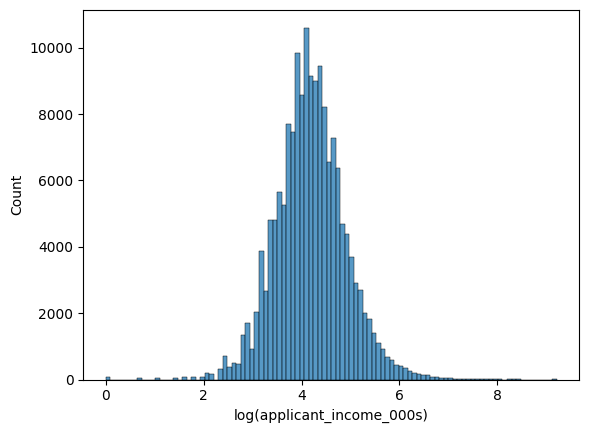

In [4]:
# Apply a log transformation to the raw applicant_income_000s values and add them as a new column to the dataframe named log(applicant_income_000s).
pickle_df['log(applicant_income_000s)'] = np.log(pickle_df['applicant_income_000s'])

# Plot another histogram for log(applicant_income_000s)
sns.histplot(data=pickle_df, x='log(applicant_income_000s)', bins=100)

In [6]:
keep_vars = ['agency_abbr', 'loan_type_name', 'loan_amount_000s', 'log(applicant_income_000s)', 'owner_occupancy_name', 'loan_purpose_name', 'property_type_name', 'applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'action_taken_name']

pickle_df_filtered = pickle_df[keep_vars]

pickle_df_filtered.columns

Index(['agency_abbr', 'loan_type_name', 'loan_amount_000s',
       'log(applicant_income_000s)', 'owner_occupancy_name',
       'loan_purpose_name', 'property_type_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'population', 'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'action_taken_name'],
      dtype='object')

In [7]:

pred_35 = pickle_df_filtered['log(applicant_income_000s)'] > 3.5
pred_43 = pickle_df_filtered['log(applicant_income_000s)'] > 4.3
pred_50 = pickle_df_filtered['log(applicant_income_000s)'] > 5.0

assert(pred_35.sum() == 140608)
assert(pred_43.sum() == 70354)
assert(pred_50.sum() == 19405)

pred_35

0          True
1         False
2          True
3          True
4          True
          ...  
165945     True
165946    False
165947     True
165948     True
165949     True
Name: log(applicant_income_000s), Length: 165950, dtype: bool

In [21]:
def accept_rate_group(group=None):
  def accept_rate(pred):
    def pred_group():
      return pred[group] if group is not None else pred
    return pred_group().mean() * 100
  return accept_rate

female = (pickle_df_filtered['applicant_sex_name'] == "Female").copy()
male = (pickle_df_filtered['applicant_sex_name'] == "Male").copy()

accept_rate = accept_rate_group()
accept_rate_male = accept_rate_group(male)
accept_rate_female = accept_rate_group(female)

## acceptance rate % across thresholds
### total
accept_rate_35 = accept_rate(pred_35)
accept_rate_43 = accept_rate(pred_43)
accept_rate_50 = accept_rate(pred_50)

### male
male_35 = male[pred_35].copy()
male_43 = male[pred_43].copy()
male_50 = male[pred_50].copy()
accept_rate_male_35 = accept_rate_male(pred_35)
accept_rate_male_43 = accept_rate_male(pred_43)
accept_rate_male_50 = accept_rate_male(pred_50)

### female
female_35 = female[pred_35].copy()
female_43 = female[pred_43].copy()
female_50 = female[pred_50].copy()
accept_rate_female_35 = accept_rate_female(pred_35)
accept_rate_female_43 = accept_rate_female(pred_43)
accept_rate_female_50 = accept_rate_female(pred_50)

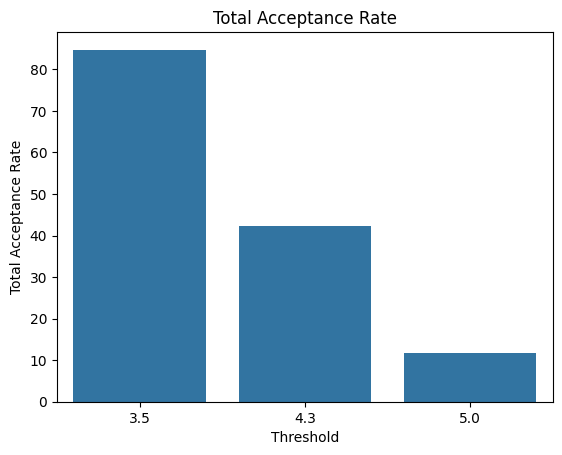

In [24]:
import seaborn as sns

# chart different thresholds: acceptance rates, disparate impact and 2-SD rule
d = pd.DataFrame({"Threshold": [3.5, 4.3, 5.0],
                  "Total Acceptance Rate": [accept_rate_35, accept_rate_43, accept_rate_50],
                  "Female Acceptance Rate": [accept_rate_female_35, accept_rate_female_43, accept_rate_female_50],
                  "Male Acceptance Rate": [accept_rate_male_35, accept_rate_male_43, accept_rate_male_50]})

sns.barplot(data=d, x="Threshold", y="Total Acceptance Rate").set_title('Total Acceptance Rate')
import matplotlib.pyplot as plt
plt.show()

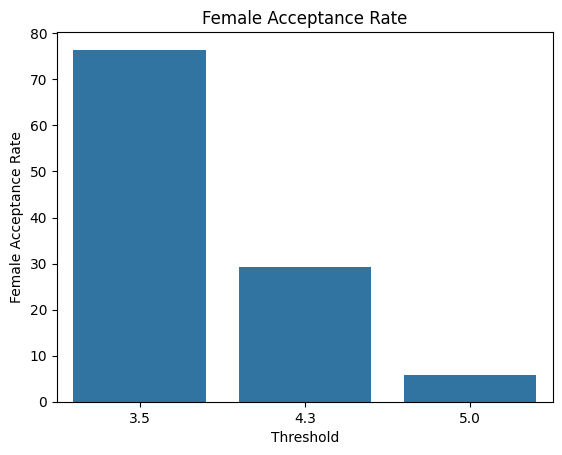

In [25]:
sns.barplot(data=d, x="Threshold", y="Female Acceptance Rate").set_title('Female Acceptance Rate')
plt.show()

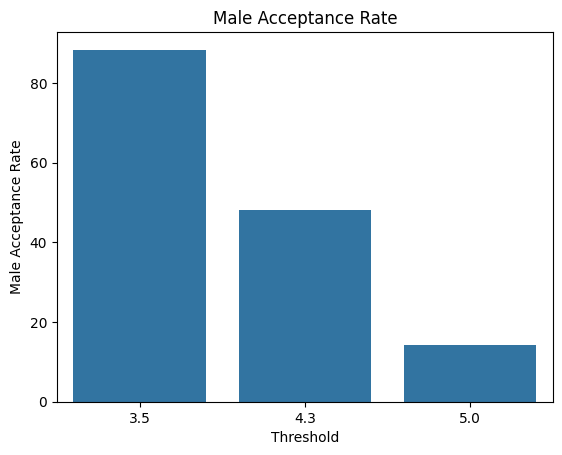

In [26]:
sns.barplot(data=d, x="Threshold", y="Male Acceptance Rate").set_title('Male Acceptance Rate')
plt.show()

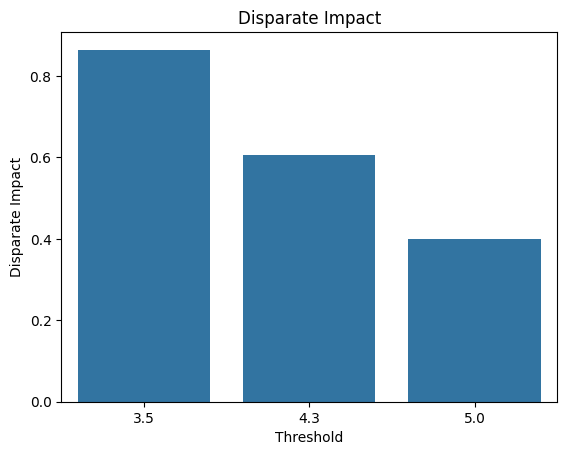

In [27]:
# Compute and chart the Disparate Impact metric
# The Disparate Impact is defined as the relation of positive outcomes for Group A (unprivileged) in relation to Group B (privileged)
# DP = Freq(decision = originated | group = female) / Freq(decision = originated | group = male)

def DispImpact(pred, group_a, group_b):
  ### Disparate Impact
  SR_A = pred[group_a==1].mean() # success rate group A
  SR_B = pred[group_b==1].mean() # success rate group B
  return SR_A/SR_B

## disparate impact across thresholds
DP_35 = DispImpact(pred_35, female, male)
DP_43 = DispImpact(pred_43, female, male)
DP_50 = DispImpact(pred_50, female, male)

from math import isclose

assert(isclose(DP_35, 0.864, rel_tol=0.001))
assert(isclose(DP_43, 0.605, rel_tol=0.001))
assert(isclose(DP_50, 0.3996, rel_tol=0.001))

d = pd.DataFrame({"Threshold": [3.5, 4.3, 5.0],
                  "Disparate Impact": [DP_35, DP_43, DP_50]})

sns.barplot(data=d, x="Threshold", y="Disparate Impact").set_title("Disparate Impact")
plt.show()

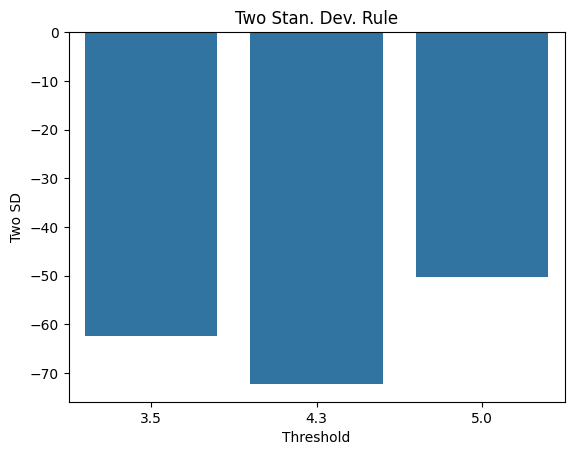

In [32]:
# Compute and chart the 2-SD Rule metric
# The 2-SD Rule is defined as the test statistic of the difference between the positive outcomes for Group A (unprivileged) in respect to Group B (privileged)

def TwoSDRule(pred, group_a, group_b):
  ### Disparate Impact
  SR_A = pred[group_a==1].mean() # success rate group A
  SR_B = pred[group_b==1].mean() # success rate group B
  SR_T = pred.mean() # success rate total
  P_min = (group_a==1).mean() # minority proportion - usually group A
  N = len(pred) # sample size
  return (SR_A - SR_B)/np.sqrt( (SR_T * (1.0 - SR_T))/(N * P_min * (1 - P_min)))


## 2-SD Rule across thresholds
TSD_35 = TwoSDRule(pred_35, female, male)
TSD_43 = TwoSDRule(pred_43, female, male)
TSD_50 = TwoSDRule(pred_50, female, male)

tsd = pd.DataFrame({"Threshold": [3.5, 4.3, 5.0],
                  "Two SD": [TSD_35, TSD_43, TSD_50]})

sns.barplot(data=tsd, x="Threshold", y="Two SD").set_title("Two Stan. Dev. Rule")
plt.show()